In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,roc_curve,roc_auc_score
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [3]:
adult_icu_raw = pd.read_csv("/home/pulkitmathur1800/csc2548_ml4h/adult_icu")
#len(adult_icu_raw.loc[adult_icu_raw['subject_id']==3])
adult_icu_raw.tail()

,subject_id,hadm_id,icustay_id,age,mort_icu,first_hosp_stay,first_icu_stay,adult_icu,eth_asian,eth_black,...,phosphate,platelet,potassium,ptt,inr,pt,sodium,bun,wbc,train
27343,99982,112748,275958,65.0,0,0,1,1,0,0,...,3.9,140.0,3.4,37.8,2.5,26.5,140.0,36.0,5.4,1
27344,99982,183791,239827,65.0,0,0,1,1,0,0,...,2.3,163.0,3.8,34.3,1.3,13.9,131.0,42.0,7.1,1
27345,99985,176670,279638,53.0,0,1,1,1,0,0,...,2.2,250.0,3.9,47.7,1.1,12.5,136.0,13.0,12.6,0
27346,99991,151118,226241,47.0,0,1,1,1,0,0,...,2.3,188.0,3.4,27.8,1.0,12.1,143.0,26.0,4.2,1
27347,99995,137810,229633,88.0,0,1,1,1,0,0,...,2.7,189.0,3.5,35.5,1.9,19.7,132.0,10.0,8.2,1


In [4]:
adult_icu_raw = pd.read_csv("/home/pulkitmathur1800/csc2548_ml4h/adult_icu")
adult_icu_raw = adult_icu_raw.drop(['subject_id','hadm_id','icustay_id'],axis=1)
bool_cols = [col for col in adult_icu_raw if np.isin(adult_icu_raw[col].dropna().unique(),[0, 1]).all()]
non_bool_cols = [item for item in adult_icu_raw.columns if item not in bool_cols]
scaler = preprocessing.StandardScaler()
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
adult_icu_scaled = scaler.fit_transform(adult_icu_raw[non_bool_cols])
adult_icu_scaled = pd.DataFrame(adult_icu_scaled, columns=non_bool_cols)
adult_icu_scaled = adult_icu_scaled.join(adult_icu_raw[bool_cols])
adult_icu_scaled.head()
adult_icu_scaled = adult_icu_raw

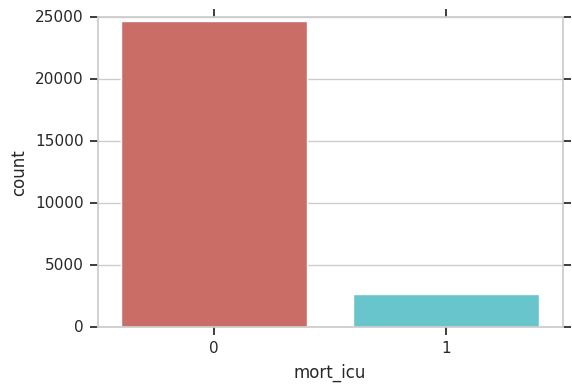

In [5]:
sns.countplot(x='mort_icu',data=adult_icu_scaled, palette='hls')
plt.show()

In [6]:
X = adult_icu_scaled.drop(['mort_icu'],axis=1)
X_train,X_test = X.loc[X['train']==1],X.loc[X['train']==0]
X_train,X_test = X_train.drop(['train'],axis=1),X_test.drop(['train'],axis=1)
Y = adult_icu_scaled[['mort_icu','train']] 
Y_train,Y_test = Y.loc[Y['train']==1],Y.loc[Y['train']==0]
Y_train,Y_test = Y_train.drop(['train'],axis=1).values.squeeze(),Y_test.drop(['train'],axis=1).values.squeeze()
X_train.head()

,age,first_hosp_stay,first_icu_stay,adult_icu,eth_asian,eth_black,eth_hispanic,eth_other,eth_white,admType_ELECTIVE,...,magnesium,phosphate,platelet,potassium,ptt,inr,pt,sodium,bun,wbc
2,41.0,1,1,1,0,0,0,1,0,0,...,1.8,2.9,258.0,2.8,21.7,1.1,12.7,140.0,16.0,7.5
3,72.0,1,1,1,0,0,0,0,1,1,...,1.7,6.6,156.0,4.9,55.2,1.7,15.9,138.0,28.0,8.4
4,39.0,1,1,1,0,0,0,0,1,0,...,1.6,3.9,216.0,3.5,44.1,1.2,13.7,139.0,13.0,16.6
5,47.0,1,1,1,0,0,0,0,1,1,...,1.4,2.0,138.0,3.9,31.8,1.5,14.9,139.0,11.0,10.5
7,87.0,0,1,1,0,0,0,0,1,0,...,1.5,4.4,275.0,3.8,31.7,1.7,18.1,137.0,49.0,30.5


In [7]:
classifier = LogisticRegression(random_state=0,penalty="l2", C=1)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
matrix = confusion_matrix(Y_test, Y_pred)
print(matrix)

[[7236   64]
 [ 736   72]]


In [8]:
classifier.score(X_train, Y_train)

0.90561330561330566

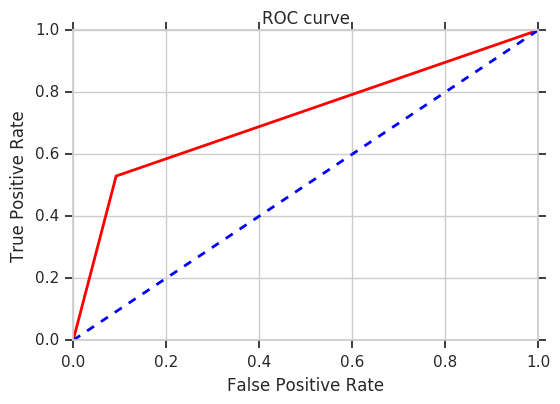

In [9]:
fpr, tpr,_=roc_curve(Y_pred,Y_test)
plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

In [10]:
roc_auc_score(Y_pred,Y_test)

0.71854431687376397

In [11]:
coefs = classifier.coef_[0]
top_five = np.argpartition(coefs, -5)[-5:]
top_five = top_five[np.argsort(coefs[top_five])]
print(top_five)
X_train[top_five].columns

[27 46 29 10  7]


Index(['resprate_mean', 'lactate', 'tempc_max', 'admType_EMERGENCY',
       'eth_other'],
      dtype='object')

In [12]:
least_five = np.argpartition(coefs, 15)[15:]
least_five = least_five[np.argsort(coefs[least_five])]
print(least_five)
X_train[least_five].columns

[50 16 22 31 13 20 52 49 34 43 35 11 23 51  3 26 17 25 36 14 56 39 53 55 15
 54 32 19  0 47 48 24 37 12  1 44 40 27 46 29 10  7]


Index(['potassium', 'sysbp_min', 'meanbp_min', 'spo2_min', 'heartrate_min',
       'diasbp_max', 'inr', 'platelet', 'glucose_min', 'glucose',
       'glucose_max', 'admType_NEWBORN', 'meanbp_max', 'ptt', 'adult_icu',
       'resprate_max', 'sysbp_max', 'resprate_min', 'glucose_mean',
       'heartrate_max', 'wbc', 'bicarbonate', 'pt', 'bun', 'heartrate_mean',
       'sodium', 'spo2_max', 'diasbp_min', 'age', 'magnesium', 'phosphate',
       'meanbp_mean', 'aniongap', 'admType_URGENT', 'first_hosp_stay',
       'hematocrit', 'bilirubin', 'resprate_mean', 'lactate', 'tempc_max',
       'admType_EMERGENCY', 'eth_other'],
      dtype='object')

In [2]:
adult_notes_raw = pd.read_csv("/home/pulkitmathur1800/csc2548_ml4h/adult_notes")
adult_notes_raw = adult_notes_raw.drop(['subject_id','hadm_id','icustay_id'],axis=1)
print(adult_notes_raw.shape)
adult_notes_raw.head()

(27348, 3)


,chartext,train,mort_icu
0,[**2101-10-21**] 1:00 AM\n CHEST (PORTABLE AP)...,0,0
1,[**2175-5-31**] 11:03 AM\n RENAL TRANSPLANT U....,0,0
2,[**2149-11-10**] 11:07 AM\n CT HEAD W/O CONTRA...,1,1
3,ADMIT NOTE\nPLEASE SEE ADMISSION HISTORY/FHP.\...,1,0
4,[**2167-1-9**] 6:11 AM\n CHEST (PORTABLE AP) ...,1,0


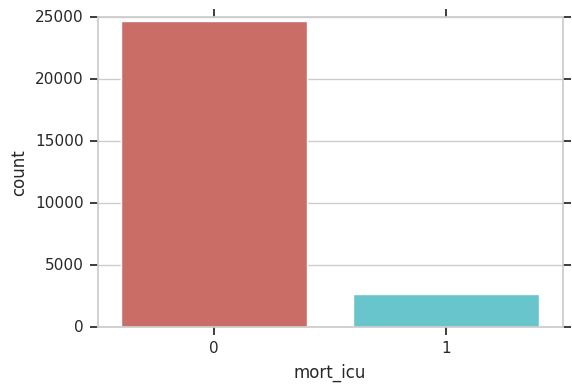

In [3]:
sns.countplot(x='mort_icu',data=adult_notes_raw, palette='hls')
plt.show()

In [4]:
#deleting punctuation
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
adult_notes_raw['chartext'].dropna(inplace=True)
adult_notes_raw.chartext = adult_notes_raw.chartext.apply(lambda x: tokenizer.tokenize(x))
adult_notes_raw.head()

,chartext,train,mort_icu
0,"[2101, 10, 21, 1, 00, AM, CHEST, PORTABLE, AP,...",0,0
1,"[2175, 5, 31, 11, 03, AM, RENAL, TRANSPLANT, U...",0,0
2,"[2149, 11, 10, 11, 07, AM, CT, HEAD, W, O, CON...",1,1
3,"[ADMIT, NOTE, PLEASE, SEE, ADMISSION, HISTORY,...",1,0
4,"[2167, 1, 9, 6, 11, AM, CHEST, PORTABLE, AP, C...",1,0


In [5]:
#deleting stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
adult_notes_raw['chartext'].dropna(inplace=True)
adult_notes_raw.chartext = adult_notes_raw.chartext.apply(lambda x: [item for item in x if item not in stop_words])

In [7]:
#handling null values if any
adult_notes_raw.chartext = adult_notes_raw.chartext.apply(lambda x: ' '.join(map(str, x)))
print(adult_notes_raw.chartext.isnull().sum())
adult_notes_raw['chartext'].fillna("empty", inplace=True)
print(adult_notes_raw.chartext.isnull().sum())

0
0


In [9]:
#train-test-split
X2 = adult_notes_raw.drop(['mort_icu'],axis=1)
X_train_notes,X_test_notes = X2.loc[X2['train']==1].drop(['train'],axis=1),X2.loc[X2['train']==0].drop(['train'],axis=1)
Y2 = adult_notes_raw[['mort_icu','train']] 
Y_train_notes,Y_test_notes = Y2.loc[Y2['train']==1],Y2.loc[Y2['train']==0]
Y_train_notes,Y_test_notes = Y_train_notes.drop(['train'],axis=1).values.squeeze(),Y_test_notes.drop(['train'],axis=1).values.squeeze()

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer()
X_train_notes = v.fit_transform(np.array(X_train_notes['chartext']))
X_test_notes = v.transform(np.array(X_test_notes['chartext']))

In [13]:
notes_classifier = LogisticRegression(random_state=0,penalty="l1", C=1)
notes_classifier.fit(X_train_notes, Y_train_notes)
Y_pred_notes = notes_classifier.predict(X_test_notes)
matrix = confusion_matrix(Y_test_notes, Y_pred)
print(matrix)

[[7251   49]
 [ 699  109]]


In [20]:
print("Accuracy: ",notes_classifier.score(X_train_notes, Y_train_notes))
print("AUC: ",roc_auc_score(Y_pred_notes,Y_test_notes))

Accuracy:  0.910446985447
AUC:  0.80097444471


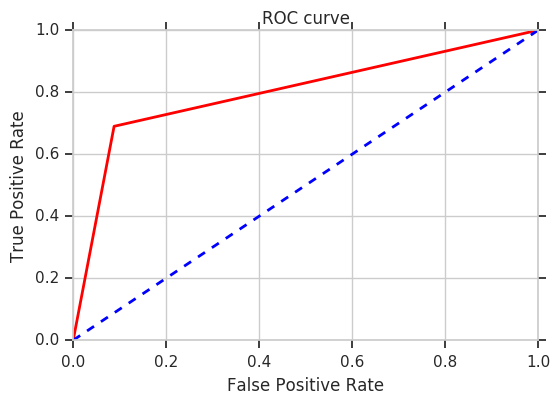

In [21]:
fpr, tpr,_=roc_curve(Y_pred_notes,Y_test_notes)
plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()